#### [**NICOLAS CACHANOSKY**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# ENDOGENOUS GROWTH WITH AN R&D SECTOR
---

This note illustrates how to code a R&D growth model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the Solow Model or to show best coding practices. The note also assumes familiarity with growth theory and a beginner experience with Python.

For a more complete and detailed discussion of Python applications see the material in [Quant Econ](https://quantecon.org/).

---

## TABLE OF CONTENTS
1. [Endogenous growth models](#1.-ENDOGENOUS-GROWTH-MODELS)
2. [The R&D growth model](#2.-THE-R&D-GROWTH-MODEL)
3. [Solving the model](#3.-SOLVING-THE-MODEL)
4. [The steady-state](#4.-THE-STEADY-STATE)
5. [The Python code](#5.-THE-PYTHON-CODE)
6. [Model stability](#6.-MODEL-STABILITY)

## 1. ENDOGENOUS GROWTH MODELS

A well-known result of the Solow Model is that growth is *exogenous*, that is, it goes unexplained by the model. Growth (in the long-run) does not depend on the savings rate, but on the growth rate of *technology* ($A$). The growth rate of $A$ is an assumption *given to* the model. Yet, Solow Model provides a number of important insights.

Endogenous growth models do not rely on "exogenous assumptions" to explain growth. One way to endogeneize growth is by adding a "production function of technology" to the model. In this sense, the R&D growth model can be intepreted as an extension of Solow model.


## 2. THE R&D GROWTH MODEL

The model assumes two sectors: (1) production of goods and (2) production of new ideas (technology). Factors of production, capital $(K)$ and labor $(L)$, are split between these two sectors. The model is built in continuous time. Labor grows at constnat rate $n$.

### 2.1 THE PRODUCTION OF GOODS

Assume a Cobb-Douglas function with constant returns to scale and labor-augmenting technology.


\begin{equation}
Y(t) = \left[(1-a_K)K \right]^{\alpha} \left[A(t) (1-a_L) L(t) \right]^{1-\alpha}; \;   \alpha \in (0, 1)
\end{equation}

where $a_K$ and $a_L$ represent the share of capital and labor allocated to the production of new ideas. Therefore, $(1-a_K)$ and $(1-a_L)$ represent the share of capital and labor allocated to the production of new goods.

### 2.2. THE ACCUMULATION OF NEW CAPITAL

Similar to Solow model, the accumulation of new capital is an exogenous fixed savings rate $(s)$ of output. For simplicity, assume there is no depreciation.

\begin{equation}
    \dot{K(t)} = s\cdot Y(t)
\end{equation}

### 2.3 THE PRODUCTION OF NEW IDEAS

The production of new ideas follows a Cobb-Douglas function that may or may not have constant returns to scale. Whether the returns to scale in the production of new ideas is decreasing, constant, or increasing depends on the assumption of how factors of production interact in the R&D industry. Because this industry prodices **ideas**, the argument of "replication" (if you double inputs you double output) does not hold.

\begin{equation}
    \dot{A(t)} = B \left[a_K K(t) \right]^{\beta} \left[a_l L(t) \right]^{\gamma} \cdot A(t)^{\theta}; \; B>0, \beta\geq 0, \gamma\geq 0
\end{equation}

The *dot* on top of $A$ denotes (instantaneous) change of technology and $B$ is a *shift parameters*. The exponent $\theta$ captures how the accumulated knowledge affects the discovery of **new** ideas. 

If the more knowledge already discovered makes it more difficulty to discover new ideas, then $\theta$ is negative. If the accumulated knowledge makes it easier to discover new ideas, then $\theta$ is larger than one. 

## 3. SOLVING THE MODEL

Solving the model implies finding how the growth rates look in the *steady-state*. Are growth rates constant? Or do they change with time?

Let $g_K(t)$ and $g_A(t)$ denote the **growth rates** of capital and technology. Then, we want to study the conditions in which $\dot{g_K(t)}=\dot{g_A(t)}=0$. To do this, we need to calculate the growth rates, and then set them constant (set the change in the growth rate equal to zero).

### 3.1 THE STEADY-STATE OF CAPITAL

We can procede in three steps to find the *steady-state* of capital. First, input the production function (of goods) into the motion function of capital. Second, calculate the growth rate of capital. Third, set the change in the growth equal to zero and "solve for" growth of capital in terms of growth of technology. The last step will be useful to plot thedynamics of the model.

The growth rates of capital and technology are $g_K(t) \equiv \frac{\dot{K(t)}}{K(t)}$ and $g_A(t) \equiv \frac{\dot{A(t)}}{A(t)}$.

\begin{align}
    \dot{K(t)}                  &= s (1-a_K)^{\alpha} (1-a_L)^{1-\alpha} \cdot K(t)^{\alpha} A(t)^{1-\alpha} L(t)^{1-\alpha} \\[5 pt]
    g_K(t)                      &= s (1-a_K)^{\alpha} (1-a_L)^{1-\alpha} \left[\frac{A(t)L(t)}{K(t)}  \right] \\[5 pt]
    \frac{\dot{g_K(t)}}{g_K(t)} &= (1-\alpha) \left[g_A(t) + n - g_K(t) \right]
\end{align}

$K$ will grow if $\left[g_A(t) + n - g_K(t) \right] > 0$. Now set $g_K(t) = 0$ and "solve for" $g_K(t)$ in terms of $g_A(t)$.

\begin{equation}
    g_K(t) = n + g_A(t)
\end{equation}

The last line is a simple linear quation with intercept $n$ and slope 1. Also, note that $g_K(t)$ **does not** depend on the savings rate or the other parameters of the production function (of final goods). Similar to Solow model, the growth rate of $K$ equals (in the steady state) the growth rate of population plus the growth rate of technology.

### 3.2 THE STEADY-STATE OF TECHNOLOGY

We can procede in a similar way than we did with capital to find the *steady-state* of technology. First, find the **growth rate** of technology. Then, set the **change** in the growth rate of technology equal to zero and solve for $g_K(t)$ in terms of $g_A(t)$.

\begin{align}
    \dot{A(t)}                  &= B \left[a_K K(t) \right]^{\beta} \left[a_l L(t) \right]^{\gamma} \cdot A(t)^{\theta} \\[5 pt]
    g_A(t)                      &= B \left[a_K K(t) \right]^{\beta} \left[a_L L(t) \right]^{\gamma} \cdot A(t)^{\theta - 1} \\[5pt]
    \frac{\dot{g_A(t)}}{g_A(t)} &= \beta g_K(t) + \gamma n + (\theta - 1) g_A(t)
\end{align}

$A$ will grow if $\left[\beta g_K(t) + \gamma n + (\theta - 1) g_A(t) \right] > 0$. Now, assuming $g_A(t) = 0$:

\begin{equation}
    g_K(t) = -\frac{\gamma n}{\beta} + \frac{(1-\theta)}{\beta} g_A(t)
\end{equation}

The last line also is a simple linear quation, with intercent $-\frac{\gamma n}{\beta}$ and slope $\frac{(1-\theta)}{\beta}$. Slope is positive *if* $1-\theta>0$, and the model has en equilibrium if $\frac{(1-\theta)}{\beta}>1$ (see the figure below).

## 4. THE STEADY-STATE

Section 3 produces two equations with two unknowns.

\begin{align}
    g_K(t) &= n + g_A(t) \\[5pt]
    g_K(t) &= -\frac{\gamma n}{\beta} + \frac{(1-\theta)}{\beta} g_A(t)
\end{align}

Sovling this system of equation yields the (constant) growth rates in the *steady-state*.

\begin{align}
    g_K(t)^* &= n \cdot \frac{\beta + \gamma}{1-(\theta + \gamma)} + n \\[5 pt]
    g_A(t)^* &= n \cdot \frac{\beta + \gamma}{1-(\theta + \gamma)}
\end{align}

Consider the following:
* Note that $g_K(t)^* > g_A(t)^*$
* If $n = 0$, then $g_K(t)^* = g_A(t)^* = 0$
* Savings rate $(s)$ does not affect long-run growth rates
* Neither $a_L$ or $a_K$ affect long-run growth rates

To be more precise, this model can be considered a *semi-endogenous* growth model. Long-run growth rates depends on endogenous variables of the model, but also on the exogenous growth rate of population.

## 5. THE PYTHON CODE

We can now plot both saddle-paths $(\dot{g_A(t)}=0, \dot{g_K(t)}=0)$ using Python. These are two linear equations. 

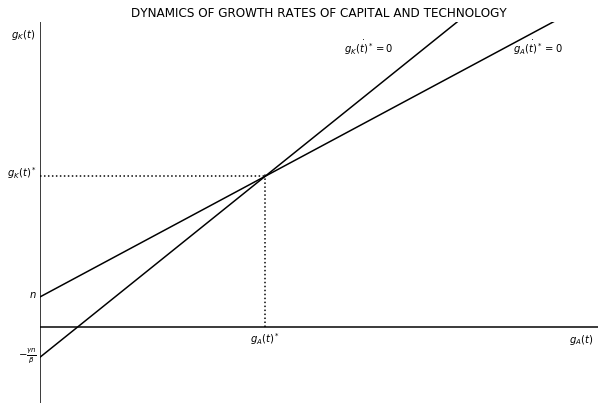

In [5]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library


"2|DEFINE PARAMETERS AND ARRAYS"
# Parameters
n     = 0.02               # Growth rate of population
beta  = 0.50               # Exponent of capital in the production of ideas
gamma = 1-beta             # Exponent of labor in the priduction of ideas
theta = 0.25               # Exponent of technology in the production of ideas

# Arrays
gA = np.arange(0, 1, 0.01) # Build an array between 0 and 1 with step size=0.01
gK = n + gA

"3|DEFINE AND POPULATE THE SADDLE-PATH FUNCTIONS" 
ss_K = n + gA                                    # Saddle path for K
ss_A = -(gamma * n)/beta + (1-theta)/beta * gA   # Saddle path for A

ss_int = -(gamma * n)/beta                       # Intercept of K saddle-path


"4|EQUILIBRIUM VALUES"
A_star = n * (beta + gamma)/(1 - (theta + gamma))
K_star = n + A_star


"5|PLOT THE SADDLE-PATH"
v = [0, gA.max()*0.2, -0.05, gK.max()*0.2]       # Axis range

# Build figure
plt.figure(figsize=(10, 7))
plt.title("DYNAMICS OF GROWTH RATES OF CAPITAL AND TECHNOLOGY")
plt.text(-0.01    , v[3]-0.01, r'$g_K(t)$')      # Manually add x-axis label
plt.text(v[1]-0.01, -0.01    , r'$g_A(t)$')      # Manually add y-axis label
plt.axis(v)
plt.box(False)
plt.xticks([], [])                               # Hide x-axis ticks
plt.yticks([], [])                               # Hide y-axis ticks
plt.axvline(0, color="k")                        # Add vertical axis
plt.axhline(0, color="k")                        # Add horizontal axis
# Add both lines
plt.plot(gA, ss_A, "k-", label=r'$g_A(t)$')
plt.plot(gA, ss_K, "k-", label=r'$g_K(t)$')
# Add equilibrium mark
plt.axvline(A_star, -v[2]/(0.25), (0.05+K_star)/0.25, color="k", ls=":")
plt.axhline(K_star, 0.0         , A_star/v[1]       , color="k", ls=":")
# Add reference values
plt.text(A_star, -0.01 , r'$g_A(t)^*$', horizontalalignment="center")
plt.text(-0.001, K_star, r'$g_K(t)^*$', horizontalalignment="right")
plt.text(-0.001, n     , r'$n$'       , horizontalalignment="right")
plt.text(-0.001, ss_int, r'$-\frac{\gamma n}{\beta}$',
         horizontalalignment="right")
# Add function labels
plt.text(v[1]-0.03, v[3]-0.02, r'$\dot{g_A(t)^*}=0$')
plt.text(v[1]-0.09, v[3]-0.02, r'$\dot{g_K(t)^*}=0$')
# Build plot
plt.show()

## 6. MODEL STABILITY

This is a stable model. Any starting point outside the *steady-state* will return to equilibrium = $\left(g_A(t)^*. g_K(t)^* \right)$. Form sections 3.1 and 3.2, we can follow the model dynamics for $A$ and $K$ the following way:

\begin{align}
    g_A(t+1) &= g_K(t) + \dot{g_K(t)} \\[5pt]
    g_K(t+1) &= g_A(t) + \dot{g_A(t)}\\[15pt]
    g_A(t+1) &= g_K(t) + (1-\alpha) \left[g_A(t) + n - g_K(t) \right] \\[5pt]
    g_K(t+1) &= g_A(t) + \beta g_K(t) + \gamma n + (\theta - 1)g_A(t)
\end{align}

Now set four arbitrary starting points: A (blue), B (green), C (red), D (cyan). These strating points will be located in the four quadrants of the model dynamics plot. From these four stating points, the code performs 75 iterations. The plot shows that the dynamics of strating points A and C remain between the two saddle paths, while starting poitns B and D cross over a saddle path to then approach the *steady-state*.

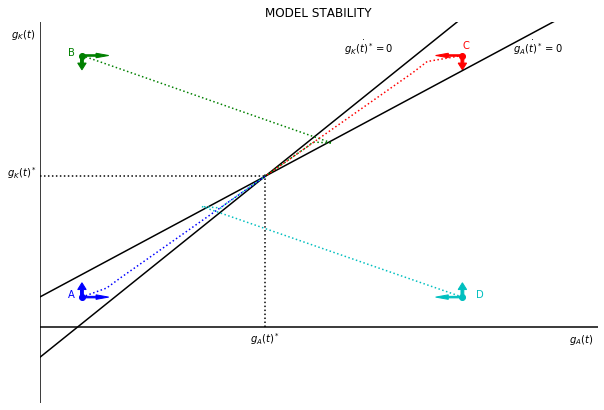

In [7]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library


"2|DEFINE PARAMETERS AND ARRAYS"
# Parameters
n     = 0.02               # Growth rate of population
alpha = 0.60               # Exponent of capital in the production of goods
beta  = 0.50               # Exponent of capital in the production of ideas
gamma = 1-beta             # Exponent of labor in the priduction of ideas
theta = 0.25               # Exponent of technology in the production of ideas

# Arrays
gA = np.arange(0, 1, 0.01) # Build an array between 0 and 1 with step size=0.01
gK = n + gA

size = np.size(gA)


"3|DEFINE AND POPULATE THE SADDLE-PATH FUNCTIONS" 
ss_K = n + gA                                    # Saddle path for K
ss_A = -(gamma * n)/beta + (1-theta)/beta * gA   # Saddle path for A


"4|EQUILIBRIUM VALUES"
A_star = n * (beta + gamma)/(1 - (theta + gamma))
K_star = n + A_star


"5|STABILITY DYNAMICS"
iterations = 75

" | Starting Poin A (blue)"
# Create arrays to store model dynamics
A_gA = np.zeros(iterations)
A_gK = np.zeros(iterations)
# Set arbitrary initial values
A_gA[0] = 0.015                                  
A_gK[0] = 0.020                                  

for j in range(1, iterations):
    A_gA[j] = A_gA[j-1] + beta*A_gK[j-1] + gamma*n + (theta-1)*A_gA[j-1]
    A_gK[j] = A_gK[j-1] + (1-alpha)*(A_gA[j-1] + n - A_gK[j-1])

" | Starting Poin B (green)"
# Create arrays to store model dynamics
B_gA = np.zeros(iterations)
B_gK = np.zeros(iterations)
# Set arbitrary initial values
B_gA[0] = 0.015
B_gK[0] = 0.180

for j in range(1, iterations):
    B_gA[j] = B_gA[j-1] + beta*B_gK[j-1] + gamma*n + (theta-1)*B_gA[j-1]
    B_gK[j] = B_gK[j-1] + (1-alpha)*(B_gA[j-1] + n - B_gK[j-1])

" | Starting Poin C (red)"
# Create arrays to store model dynamics
C_gA = np.zeros(iterations)
C_gK = np.zeros(iterations)
# Set arbitrary initial values
C_gA[0] = 0.150
C_gK[0] = 0.180

for j in range(1, iterations):
    C_gA[j] = C_gA[j-1] + beta*C_gK[j-1] + gamma*n + (theta-1)*C_gA[j-1]
    C_gK[j] = C_gK[j-1] + (1-alpha)*(C_gA[j-1] + n - C_gK[j-1])

" | Starting Poin D (cyan)"
# Create arrays to store model dynamics
D_gA = np.zeros(iterations)
D_gK = np.zeros(iterations)
# Set arbitrary initial values
D_gA[0] = 0.150
D_gK[0] = 0.020

for j in range(1, iterations):
    D_gA[j] = D_gA[j-1] + beta*D_gK[j-1] + gamma*n + (theta-1)*D_gA[j-1]
    D_gK[j] = D_gK[j-1] + (1-alpha)*(D_gA[j-1] + n - D_gK[j-1])


"5|PLOT THE SADDLE-PATH"
v = [0, gA.max()*0.2, -0.05, gK.max()*0.2]       # Axis range

# Build figure
plt.figure(figsize=(10, 7))
plt.title("MODEL STABILITY")
plt.text(-0.01    , v[3]-0.01, r'$g_K(t)$')      # Manually add x-axis label
plt.text(v[1]-0.01, -0.01    , r'$g_A(t)$')      # Manually add y-axis label
plt.axis(v)
plt.box(False)
plt.xticks([], [])                               # Hide x-axis ticks
plt.yticks([], [])                               # Hide y-axis ticks
plt.axvline(0, color="k")                        # Add vertical axis
plt.axhline(0, color="k")                        # Add horizontal axis
# Add both lines
plt.plot(gA, ss_A, "k-", label=r'$g_A(t)$')
plt.plot(gA, ss_K, "k-", label=r'$g_K(t)$')
# Add equilibrium mark
plt.axvline(A_star, -v[2]/(0.25), (0.05+K_star)/0.25, color="k", ls=":")
plt.axhline(K_star, 0.0         , A_star/v[1]       , color="k", ls=":")
# Add reference values
plt.text(A_star, -0.01 , r'$g_A(t)^*$', horizontalalignment="center")
plt.text(-0.001, K_star, r'$g_K(t)^*$', horizontalalignment="right")
# Add function labels
plt.text(v[1]-0.03, v[3]-0.02, r'$\dot{g_A(t)^*}=0$')
plt.text(v[1]-0.09, v[3]-0.02, r'$\dot{g_K(t)^*}=0$')
# Model dynamics
plt.plot(A_gA[0], A_gK[0], "bo")
plt.plot(A_gA   , A_gK   , "b:")
plt.plot(B_gA[0], B_gK[0], "go")
plt.plot(B_gA   , B_gK   , "g:")
plt.plot(C_gA[0], C_gK[0], "ro")
plt.plot(C_gA   , C_gK   , "r:")
plt.plot(D_gA[0], D_gK[0], "co")
plt.plot(D_gA   , D_gK   , "c:")
plt.text(A_gA[0]-0.005, A_gK[0]      , "A", color="b")
plt.text(B_gA[0]-0.005, B_gK[0]      , "B", color="g")
plt.text(C_gA[0]      , C_gK[0]+0.005, "C", color="r")
plt.text(D_gA[0]+0.005, D_gK[0]      , "D", color="c")
# Arrows
plt.arrow(A_gA[0], A_gK[0],  0.005, 0    , color="b")
plt.arrow(A_gA[0], A_gK[0],  0    , 0.005, color="b")
plt.arrow(B_gA[0], B_gK[0],  0.005, 0    , color="g")
plt.arrow(B_gA[0], B_gK[0],  0    ,-0.005, color="g")
plt.arrow(C_gA[0], C_gK[0], -0.005, 0    , color="r")
plt.arrow(C_gA[0], C_gK[0],  0    ,-0.005, color="r")
plt.arrow(D_gA[0], D_gK[0], -0.005, 0    , color="c")
plt.arrow(D_gA[0], D_gK[0],  0    , 0.005, color="c")
# Build plot
plt.show()